In [11]:
import pandas as pd
import numpy as np

# 1a. Data Exploratory

Data dibawah ini merupakan data winter olympics. terdapat 6 kolom yaitu:

In [4]:
df=pd.read_csv('Winner_Olympic_Medals.csv')
df.columns

Index(['Year', 'Sport', 'Event', 'Country', 'Gender', 'Medal Rank', 'Medal',
       'Name of Athlete or Team', 'Age of Athlete'],
      dtype='object')


Year : Tahun terjadinya Winter Olympic<br>
Sport: Cabang olahraga<br>
Event: Detail jenis kelamin & detil cabang olahraga<br>
Country: Negara perwakilan<br>
Gender : Jenis Kelamin<br>
Medal Rank: Ranking pemenang<br>
Medal : Jenis Medali<br>
Name of Athlete or Team : Nama atlet (jika bermain single) / Nama Team (Jika bermain komunal)<br>
Age of Athlete : Umur dari atlet

Tipe datanya adalah

In [17]:
df.dtypes

Year                         int64
Sport                       object
Event                       object
Country                     object
Gender                      object
Medal Rank                   int64
Medal                       object
Name of Athlete or Team     object
Age of Athlete             float64
dtype: object

In [19]:
df.shape

(2865, 9)

Terdapat 9 Kolom & 2865 Baris

# 1b. Statistics

## Negara dengan urutan medali emas terbanyak

In [158]:
lx=df.loc[df['Medal Rank']==1].groupby('Country').agg({'Medal Rank':'count'}).reset_index().sort_values('Medal Rank',ascending=False)
lx

,Country,Medal Rank
21,Norway,118
33,United States,96
15,Germany,86
27,Soviet Union,78
6,Canada,62
1,Austria,59
30,Switzerland,50
29,Sweden,50
23,Russia,49
13,Finland,42


## Negara dengan rata - rata raihan medali emas per olimpiade

In [144]:
a=df.loc[df['Medal Rank']==1].groupby(['Country','Year']).agg({'Medal Rank':'sum'}).reset_index().sort_values('Medal Rank',ascending=False)
a=a.assign(jumlah_tahun=lambda x:1)
avg=a.groupby('Country').apply(lambda x: x['Medal Rank'].sum() /
                                   x['jumlah_tahun'].sum())
a['avg']=a['Country'].map(avg)

avg=a[['Country','avg']]
avg=avg.groupby('Country').agg({'avg':'mean'}).reset_index().sort_values('avg',ascending=False)
avg

,Country,avg
32,Unified Team,9.000000
27,Soviet Union,8.666667
23,Russia,8.166667
15,Germany,7.166667
11,East Germany,6.500000
21,Norway,5.619048
33,United States,4.363636
26,South Korea,3.714286
6,Canada,3.647059
20,Netherlands,3.083333


# 1c. Data Cleaning

In [148]:
na=df.isna().sum()
na

Year                         0
Sport                        0
Event                        0
Country                      0
Gender                       0
Medal Rank                   0
Medal                        0
Name of Athlete or Team      0
Age of Athlete             692
dtype: int64

Terdapat NA value pada kolom 'Age of athlete'

In [153]:
la=df['Age of Athlete'] = df['Age of Athlete'].fillna((df['Age of Athlete'].mean()))
la

0       25.152324
1       25.152324
2       25.152324
3       29.000000
4       24.000000
          ...    
2860    30.000000
2861    31.000000
2862    27.000000
2863    25.152324
2864    25.152324
Name: Age of Athlete, Length: 2865, dtype: float64

Mengganti NA value dengan nilai mean

In [156]:
la=df.fillna(df.mean())
la

,Year,Sport,Event,Country,Gender,Medal Rank,Medal,Name of Athlete or Team,Age of Athlete
0,1924,Bobsled,Men's Four/Five,Switzerland,Men,1,gold,Switzerland-1,25.152324
1,1924,Bobsled,Men's Four/Five,Britain,Men,2,silver,Britain-1,25.152324
2,1924,Bobsled,Men's Four/Five,Belgium,Men,3,bronze,Belgium-1,25.152324
3,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,1,gold,Thorleif Haug,29.000000
4,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,2,silver,Johan GrÃ¸ttumsbraaten,24.000000
...,...,...,...,...,...,...,...,...,...
2860,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,1,gold,Alexander Legkov,30.000000
2861,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,2,silver,Maxim Vylegzhanin,31.000000
2862,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,3,bronze,Ilia Chernousov,27.000000
2863,2014,Ice Hockey,Men's Ice Hockey,Canada,Men,1,gold,Canada,25.152324


In [157]:
ne=la.isna().sum()
ne

Year                       0
Sport                      0
Event                      0
Country                    0
Gender                     0
Medal Rank                 0
Medal                      0
Name of Athlete or Team    0
Age of Athlete             0
dtype: int64

# 1d. Visualisasi Raihan Medali Emas Tiap Negara

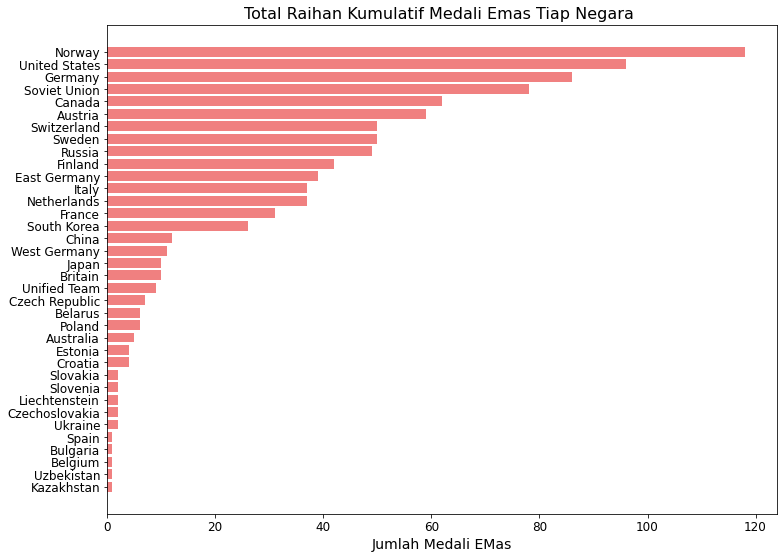

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,9))
plt.barh(lx['Country'], lx['Medal Rank'], color='lightcoral')
plt.gca().invert_yaxis()

plt.title('Total Raihan Kumulatif Medali Emas Tiap Negara ', size=16)
plt.xlabel('Jumlah Medali EMas', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()